# **NLTK**

In [18]:
import pandas as pd
train_set=pd.read_csv("train_final.csv")
test_set=pd.read_csv("test_final.csv")

In [19]:
train_set.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


# Find unique patterns inside each set

In [20]:
train_set['label'].unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [21]:
test_set['label'].unique()

array(['true', 'false', 'half-true', 'pants-fire', 'barely-true',
       'mostly-true'], dtype=object)

# Reduce multi labeling to binary labeling

In [22]:
train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
train_set.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,F,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,T,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,T,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,F,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,T,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


# check new labels

In [23]:
train_set['label'].unique()

array(['F', 'T'], dtype=object)

In [24]:
test_set['label'].unique()

array(['T', 'F'], dtype=object)

# **A :**
## Remove null values inside train&test set

In [25]:
train_set=train_set[train_set['sentiment'].notnull()].reset_index(drop=True)
print(train_set.shape)

(8848, 31)


In [26]:
test_set=test_set[test_set['sentiment'].notnull()].reset_index(drop=True)
print(test_set.shape)

(1091, 30)


In [27]:
train_set['sentiment'].unique()

array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [28]:
test_set['sentiment'].unique()

array(['NEGATIVE', 'POSITIVE'], dtype=object)

## count the total unique values for sentiment column.

### Train

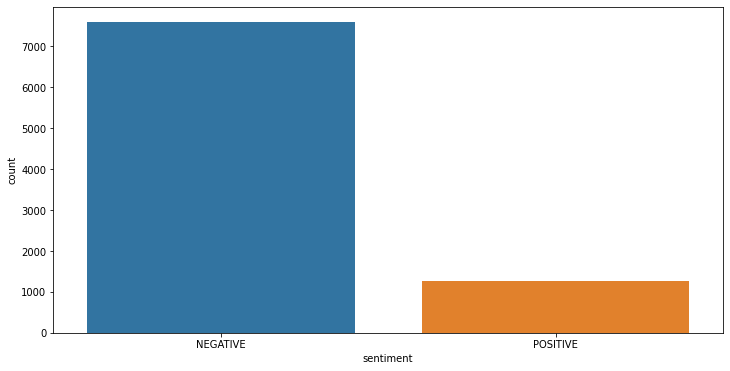

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=train_set,x='sentiment')

### Test


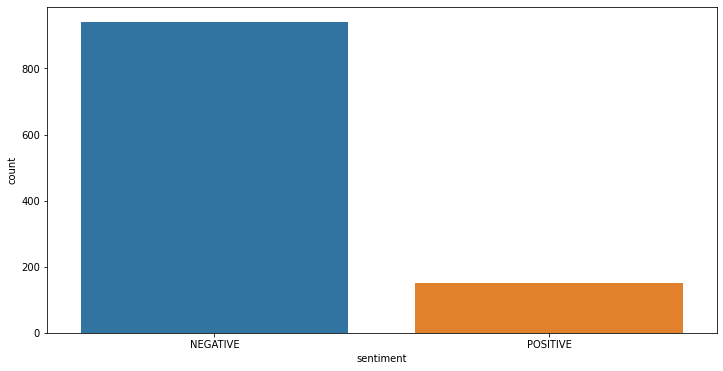

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=test_set,x='sentiment')

## Some statistical analysis on anger column

In [31]:
print(f"the maximum number : {train_set['anger'].max()}")
print(f"The Minimum number : {train_set['anger'].min()}")
print(f"The Mean is : {train_set['anger'].mean()}")
print(f"The median is : {train_set['anger'].median()}")

the maximum number : 0.931034
The Minimum number : 0.0
The Mean is : 0.16214185431735986
The median is : 0.132466


## Each of the four columns tend to have a poisson disturbution.

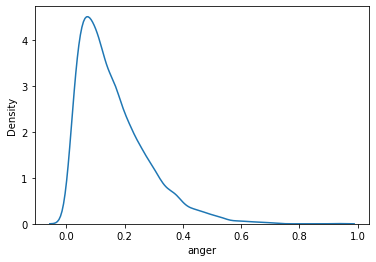

In [32]:
sns.kdeplot(data=train_set,x='anger')

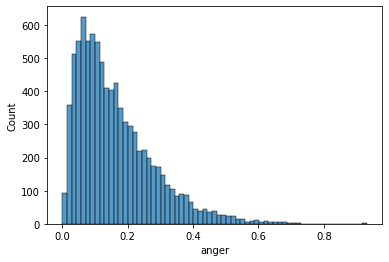

In [33]:
sns.histplot(data=train_set,x='anger');

# Set a threshold to binarize numeric values into binary ones

In [34]:
for col in ['anger','fear','joy','disgust','sad']:
  train_set[col]=train_set[col].apply(lambda x: x>= 0.4)

In [35]:
for col in ['anger','fear','joy','disgust','sad']:
  test_set[col]=test_set[col].apply(lambda x: x>= 0.4)

In [36]:
def binarize_text(text):
  if text=='NEGATIVE' :
    return False
  else:
    return True

In [37]:
train_set['sentiment']=train_set['sentiment'].apply(binarize_text)

In [38]:
test_set['sentiment']=test_set['sentiment'].apply(binarize_text)

In [39]:
train_set.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,F,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,False,False,False,False,True,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,T,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,False,False,False,False,False,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,T,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,False,False,True,True,False,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,F,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,False,False,False,False,False,_3_,"[0, 1]",_NEG_
4,5,5,5,5,5,5,12465.json,T,The Chicago Bears have had more starting quart...,education,...,-0.3,0.3,False,False,False,False,True,_5_,"[1, 0]",_NEG_


## An overview of our final feature's structure(5 Features)

In [40]:
sel_features=['sentiment','anger','fear','joy','disgust','sad']

In [41]:
train_set[sel_features]#.set_index(train_set.column())

,sentiment,anger,fear,joy,disgust,sad
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,True,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
8843,False,False,False,False,False,False
8844,False,False,False,False,False,True
8845,False,False,False,False,False,False
8846,False,False,False,False,False,False


# Write a function to creat a feature set from our dataframe

In [42]:
def return_feature_set(df):
  feature_set=[]
  for i,row in df.iterrows():
    my_dict={}
    for col in sel_features:
      my_dict[col]=row[col]
    feature_set.append((my_dict,row['label']))
  return feature_set


In [43]:
feature_set_train=return_feature_set(train_set)
feature_set_test=return_feature_set(test_set)

# Evaluating our performance

In [44]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import precision_recall_fscore_support,classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
NB = nltk.NaiveBayesClassifier.train(feature_set_train)

In [46]:
print(nltk.classify.accuracy(NB , feature_set_test)*100)

58.020164986251146


In [47]:
y_pred=[]
y_test=[]
for sample in feature_set_test:
        y_pred.append(NB.classify(sample[0]))
        y_test.append(sample[1])
print(f"The naive bayes accuracy is \n: {nltk.classify.accuracy(NB , feature_set_test)*100}")
print("         precision    ,                     recall           ,                 fscore         ,         support        => \n")
print(f"{precision_recall_fscore_support(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

The naive bayes accuracy is 
: 58.020164986251146
         precision    ,                     recall           ,                 fscore         ,         support        => 

(array([0.54225352, 0.58587987]), array([0.16382979, 0.89533011]), array([0.25163399, 0.70828025]), array([470, 621]))

              precision    recall  f1-score   support

           F       0.54      0.16      0.25       470
           T       0.59      0.90      0.71       621

    accuracy                           0.58      1091
   macro avg       0.56      0.53      0.48      1091
weighted avg       0.57      0.58      0.51      1091



# **B :**
## Deleting Sentiment Column

In [ ]:
train_set=pd.read_csv("train_final.csv")
test_set=pd.read_csv("test_final.csv")

train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})

train_set=train_set.drop('sentiment',axis=1)
test_set=test_set.drop('sentiment',axis=1)

for col in ['anger','fear','joy','disgust','sad']:
  train_set[col]=train_set[col].apply(lambda x: x>= 0.4)
for col in ['anger','fear','joy','disgust','sad']:
  test_set[col]=test_set[col].apply(lambda x: x>= 0.4)

sel_features=['anger','fear','joy','disgust','sad']
feature_set_train=return_feature_set(train_set)
feature_set_test=return_feature_set(test_set)

NB = nltk.NaiveBayesClassifier.train(feature_set_train)
print(f"The naive bayes accuracy is \n: {nltk.classify.accuracy(NB , feature_set_test)*100}")

y_pred=[]
y_test=[]
for sample in feature_set_test:
        y_pred.append(NB.classify(sample[0]))
        y_test.append(sample[1])
print("         precision    ,                     recall           ,                 fscore         ,         support        => \n")
print(f"{precision_recall_fscore_support(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

The naive bayes accuracy is 
: 56.827150749802676
         precision    ,                     recall           ,                 fscore         ,         support        => 

(array([0.75      , 0.56653386]), array([0.01627486, 0.99579832]), array([0.03185841, 0.72219401]), array([553, 714]))

              precision    recall  f1-score   support

           F       0.75      0.02      0.03       553
           T       0.57      1.00      0.72       714

    accuracy                           0.57      1267
   macro avg       0.66      0.51      0.38      1267
weighted avg       0.65      0.57      0.42      1267



# **C :**
## Repalcing null values with zero 

In [ ]:
train_set=pd.read_csv("train_final.csv")
test_set=pd.read_csv("test_final.csv")

train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})

train_set['sentiment']= train_set['sentiment'].fillna('NEGATIVE')
test_set['sentiment'] = test_set['sentiment'].fillna('NEGATIVE')

train_set['sentiment']=train_set['sentiment'].apply(binarize_text)
test_set['sentiment']=test_set['sentiment'].apply(binarize_text)

train_set[['sentiment','anger','fear','joy','disgust','sad']]=train_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')
test_set[['sentiment','anger','fear','joy','disgust','sad']]=test_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')
for col in ['anger','fear','joy','disgust','sad']:
  train_set[col]=train_set[col].apply(lambda x: x>=0.25)
for col in ['anger','fear','joy','disgust','sad']:
  test_set[col]=test_set[col].apply(lambda x: x>= 0.25)


sel_features=['anger','fear','joy','disgust','sad']
feature_set_train=return_feature_set(train_set)
feature_set_test=return_feature_set(test_set)

NB = nltk.NaiveBayesClassifier.train(feature_set_train)
print(f"The naive bayes accuracy is \n: {nltk.classify.accuracy(NB , feature_set_test)*100}")

y_pred=[]
y_test=[]
for sample in feature_set_test:
        y_pred.append(NB.classify(sample[0]))
        y_test.append(sample[1])
print("         precision    ,                     recall           ,                 fscore         ,         support        => \n")
print(f"{precision_recall_fscore_support(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

The naive bayes accuracy is 
: 57.69534333070244
         precision    ,                     recall           ,                 fscore         ,         support        => 

(array([0.56390977, 0.57848325]), array([0.13562387, 0.91876751]), array([0.21865889, 0.70995671]), array([553, 714]))

              precision    recall  f1-score   support

           F       0.56      0.14      0.22       553
           T       0.58      0.92      0.71       714

    accuracy                           0.58      1267
   macro avg       0.57      0.53      0.46      1267
weighted avg       0.57      0.58      0.50      1267



# **C** 
## What is the best threshold?

In [ ]:
def return_acc(t):
  train_set=pd.read_csv("train_final.csv")
  test_set=pd.read_csv("test_final.csv")

  train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
  test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})

  train_set=train_set[train_set['sentiment'].notnull()].reset_index(drop=True)
  test_set=test_set[test_set['sentiment'].notnull()].reset_index(drop=True)

  train_set['sentiment']=train_set['sentiment'].apply(binarize_text)
  test_set['sentiment']=test_set['sentiment'].apply(binarize_text)

  train_set[['sentiment','anger','fear','joy','disgust','sad']]=train_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')
  test_set[['sentiment','anger','fear','joy','disgust','sad']]=test_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')
  for col in ['anger','fear','joy','disgust','sad']:
    train_set[col]=train_set[col].apply(lambda x: x>= t)
  for col in ['anger','fear','joy','disgust','sad']:
    test_set[col]=test_set[col].apply(lambda x: x>= t)

  
  sel_features=['anger','fear','joy','disgust','sad']
  feature_set_train=return_feature_set(train_set)
  feature_set_test=return_feature_set(test_set)

  NB = nltk.NaiveBayesClassifier.train(feature_set_train)
  return (nltk.classify.accuracy(NB , feature_set_test)*100)


In [ ]:
Acc=[]
import numpy as np
for num in np.arange(0.10,0.71,0.01):
  Acc.append(return_acc(num))

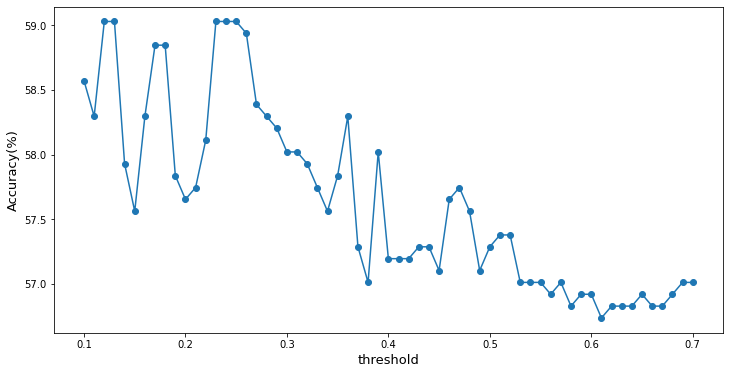

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0.10,0.71,0.01),Acc,marker='o')
plt.xlabel('threshold',size=13)
plt.ylabel('Accuracy(%)',size=13);

# **Sklearn**

In [ ]:
def vectorize(method_name):
  if method_name=='method1':
    train_set=pd.read_csv("train_final.csv")
    test_set=pd.read_csv("test_final.csv")

    train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
    test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})

    train_set=train_set[train_set['sentiment'].notnull()].reset_index(drop=True)
    test_set=test_set[test_set['sentiment'].notnull()].reset_index(drop=True)

    train_set['sentiment']=train_set['sentiment'].apply(binarize_text)
    test_set['sentiment']=test_set['sentiment'].apply(binarize_text)

    train_set[['sentiment','anger','fear','joy','disgust','sad']]=train_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')
    test_set[['sentiment','anger','fear','joy','disgust','sad']]=test_set[['sentiment','anger','fear','joy','disgust','sad']].astype('float')

  elif method_name=='method2':
      train_set=pd.read_csv("train_final.csv")
      test_set=pd.read_csv("test_final.csv")

      train_set= train_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})
      test_set= test_set.replace({'label':{'barely-true':'F', 'pants-fire':'F', 'false':'F','half-true':'T','mostly-true':'T','true':'T'}})

      train_set=train_set.drop('sentiment',axis=1)
      test_set=test_set.drop('sentiment',axis=1)
      train_set[['anger','fear','joy','disgust','sad']]=train_set[['anger','fear','joy','disgust','sad']].astype('float')
      test_set[['anger','fear','joy','disgust','sad']]=test_set[['anger','fear','joy','disgust','sad']].astype('float')
  
  return train_set[['anger','fear','joy','disgust','sad']],test_set[['anger','fear','joy','disgust','sad']],train_set['label'],test_set['label']



In [ ]:
tr_set,ts_set,label_tr,label_ts=vectorize('method2')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(tr_set,label_tr).predict(ts_set)
print(f"The Accuracy is : {accuracy_score(y_pred,label_ts)}")

The Accuracy is : 0.5753749013417522


The naive bayes accuracy is 
: 57.69534333070244
         precision    ,                     recall           ,                 fscore         ,         support        => 

(array([0.53521127, 0.58349146]), array([0.20614828, 0.86134454]), array([0.29765013, 0.69570136]), array([553, 714]))

              precision    recall  f1-score   support

           F       0.54      0.21      0.30       553
           T       0.58      0.86      0.70       714

    accuracy                           0.58      1267
   macro avg       0.56      0.53      0.50      1267
weighted avg       0.56      0.58      0.52      1267



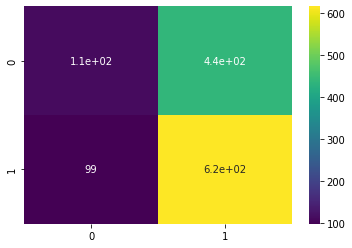

In [ ]:
print(f"The naive bayes accuracy is \n: {nltk.classify.accuracy(NB , feature_set_test)*100}")
print("         precision    ,                     recall           ,                 fscore         ,         support        => \n")
print(f"{precision_recall_fscore_support(label_ts, y_pred)}\n")
print(classification_report(label_ts, y_pred))
sns.heatmap(confusion_matrix(label_ts, y_pred),annot=True,cmap='viridis');